In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Create a dataset containing 2000 rows.
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-12-31')
date = pd.date_range(start=start_date, end=end_date)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

amount_donated = np.random.randint(10, 1001, size=2000)

gender = np.random.choice(['Male', 'Female'], size=2000)

data = {
    'Date': np.random.choice(date, size=2000),
    'Day of Week': np.random.choice(days, size=2000),
    'Amount Donated': amount_donated,
    'Gender': gender
}

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

df.head()



Date Day of Week  Amount Donated  Gender
0 2023-07-20      Monday             494  Female
1 2023-08-11      Monday             626  Female
2 2022-01-04    Saturday             814  Female
3 2022-11-04      Friday             488    Male
4 2022-12-18     Tuesday             464  Female

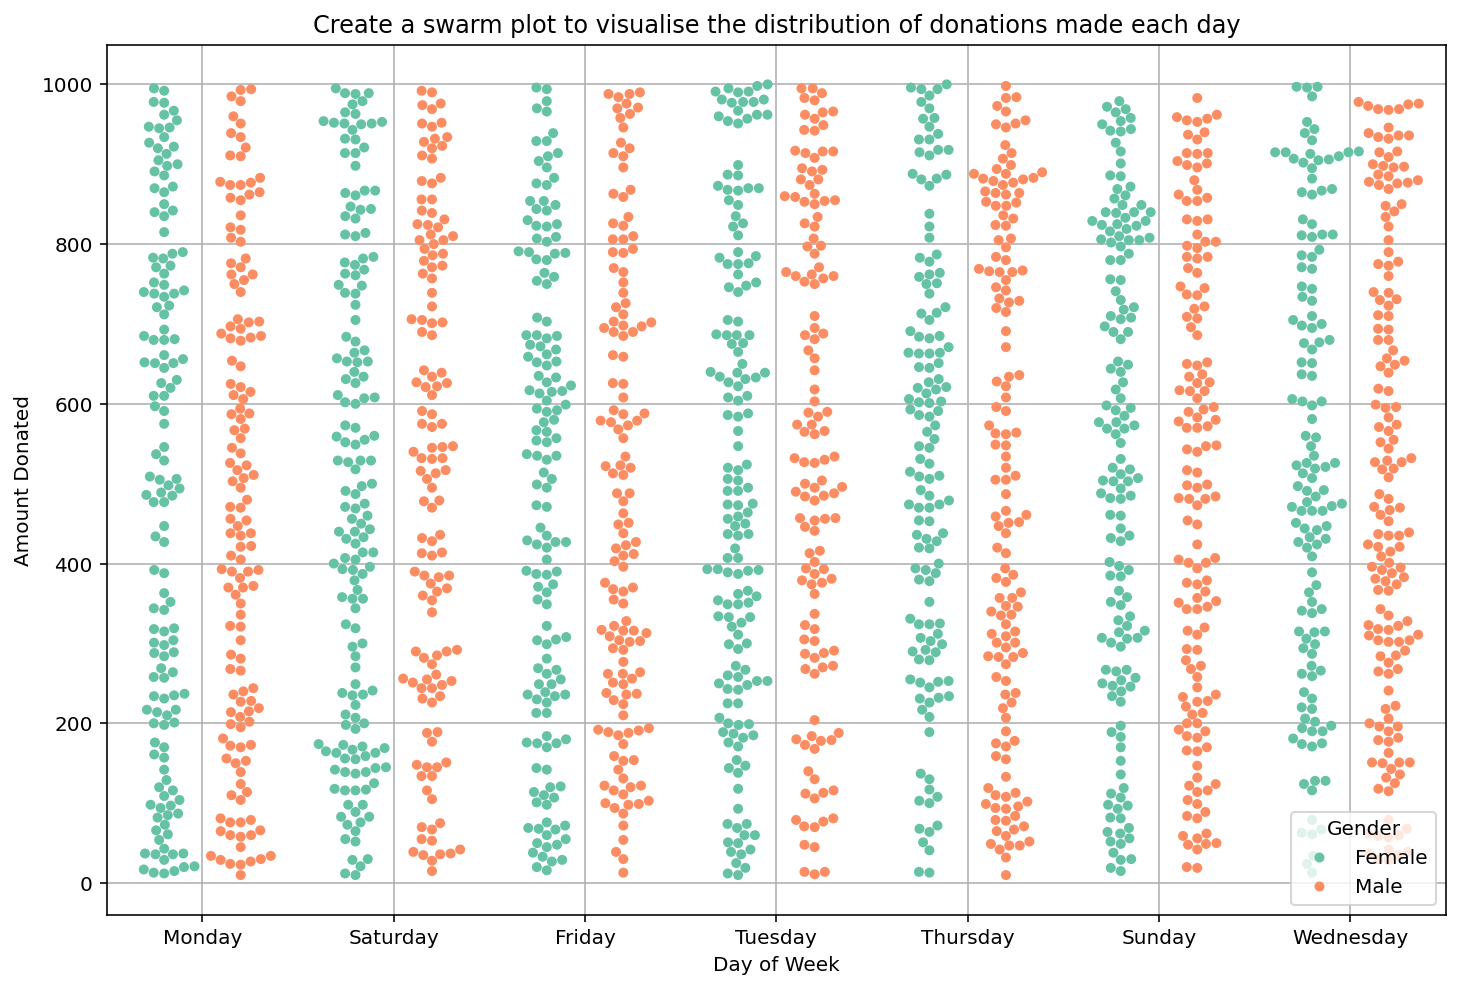

In [6]:

# Create a swarm plot to visualise the distribution of donations made each day.
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Day of Week', y='Amount Donated', hue='Gender', data=df, dodge=True, palette='Set2')
plt.title('Create a swarm plot to visualise the distribution of donations made each day')
plt.xlabel('Day of Week')
plt.ylabel('Amount Donated')
plt.legend(title='Gender', loc='best')
plt.grid(True)

plt.show()



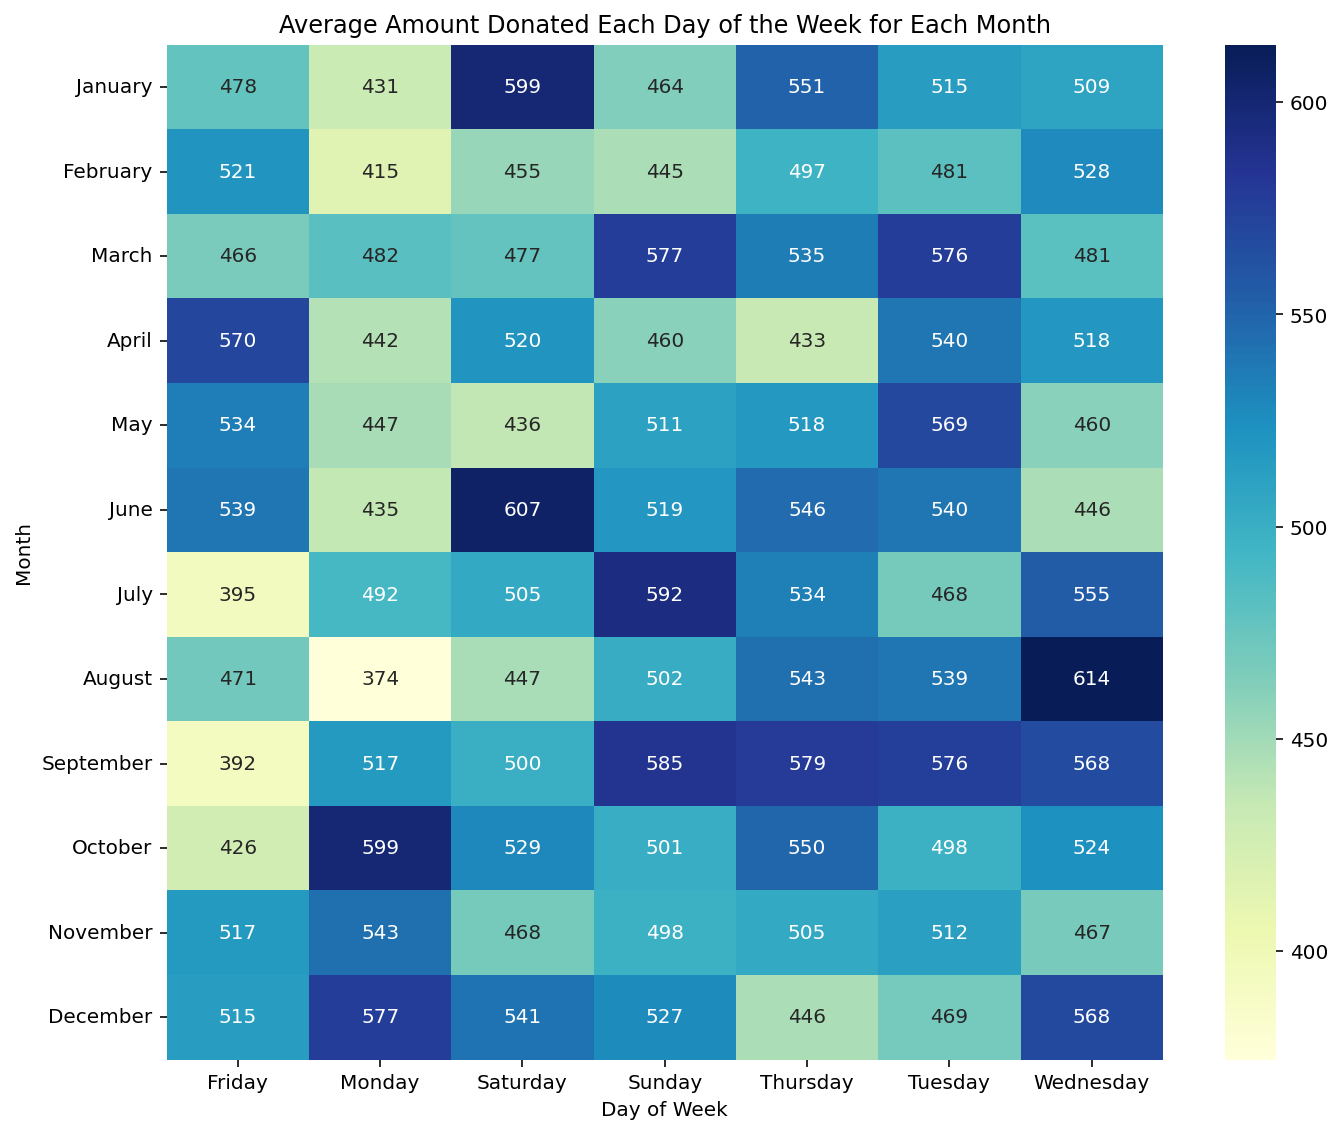

In [7]:

df['Month'] = df['Date'].dt.month_name()
heatmap_data = df.groupby(['Month', 'Day of Week'])['Amount Donated'].mean().reset_index()


heatmap_data = heatmap_data.pivot(index='Month', columns='Day of Week', values='Amount Donated')


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data.reindex(month_order)


plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Amount Donated Each Day of the Week for Each Month')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.tight_layout()
plt.show()